In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

In [2]:
from scratch.linear_algebra import Vector

def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

assert num_differences([1, 2, 3], [2, 1, 3]) == 2
assert num_differences([1, 2], [1, 2]) == 0

In [3]:
from typing import List
from scratch.linear_algebra import vector_mean

def cluster_means(k: int,
                  inputs: List[Vector],
                  assignments: List[int]) -> List[Vector]:
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)

    # if a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs)
            for cluster in clusters]

In [4]:
import itertools
import random
import tqdm
from scratch.linear_algebra import squared_distance

class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k                      # number of clusters
        self.means = None

    def classify(self, input: Vector) -> int:
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs: List[Vector]) -> None:
        # Start with random assignments
        assignments = [random.randrange(self.k) for _ in inputs]

        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute means and find new assignments
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]

                # Check how many assignments changed and if we're done
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return

                # Otherwise keep the new assignments, and compute new means
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")

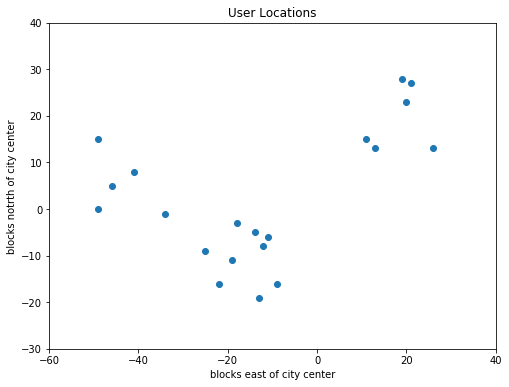

In [5]:
inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],
                             [26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],
                             [-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]
    
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(*zip(*inputs))
ax.set_xlabel('blocks east of city center')
ax.set_ylabel('blocks notrth of city center')
ax.set_title('User Locations')
ax.set_xlim(-60,40); ax.set_ylim(-30,40);

In [6]:
random.seed(12)                   # so you get the same results as me
clusterer = KMeans(k=3)
clusterer.train(inputs)
means = sorted(clusterer.means)   # sort for the unit test

assert len(means) == 3

# Check that the means are close to what we expect.
assert squared_distance(means[0], [-44, 5]) < 1
assert squared_distance(means[1], [-16, -10]) < 1
assert squared_distance(means[2], [18, 20]) < 1

changed: 5 / 20: : 0it [00:00, ?it/s]


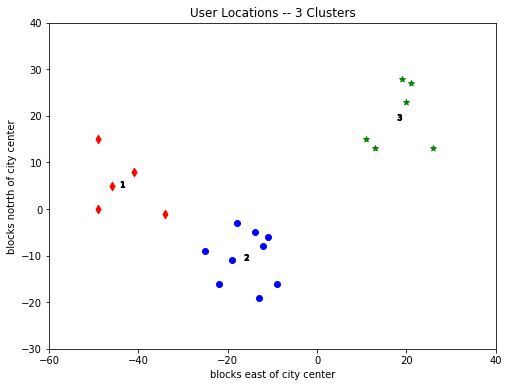

In [7]:
y_pred = [clusterer.classify(x) for x in inputs]
cluster_order = [idx for idx,x in sorted(enumerate(clusterer.means),key=lambda x: x[1])]

fig,ax = plt.subplots(1,1,figsize=(8,6))
marks = ['d','o','*']
colors = ['r','b','g']
for idx,cluster in enumerate(cluster_order):
    ax.scatter(*zip(*[x for idx,x in enumerate(inputs) if y_pred[idx] == cluster]),
               marker=marks[idx],
               color=colors[idx]
              )
    ax.scatter(*clusterer.means[cluster],marker=f'${idx+1}$',
               color='k')
ax.set_xlabel('blocks east of city center')
ax.set_ylabel('blocks notrth of city center')
ax.set_title('User Locations -- 3 Clusters')
ax.set_xlim(-60,40); ax.set_ylim(-30,40);

In [8]:
random.seed(0)
clusterer = KMeans(k=2)
clusterer.train(inputs)
means = sorted(clusterer.means)

assert len(means) == 2
assert squared_distance(means[0], [-26, -5]) < 1
assert squared_distance(means[1], [18, 20]) < 1

changed: 4 / 20: : 0it [00:00, ?it/s]


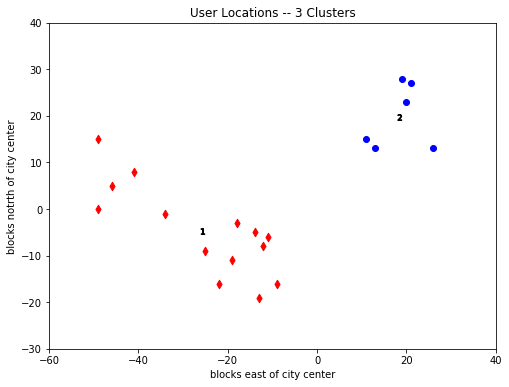

In [9]:
y_pred = [clusterer.classify(x) for x in inputs]

cluster_order = [idx for idx,x in sorted(enumerate(clusterer.means),key=lambda x: x[1])]

fig,ax = plt.subplots(1,1,figsize=(8,6))
marks = ['d','o']
colors = ['r','b']
for idx,cluster in enumerate(cluster_order):
    ax.scatter(*zip(*[x for idx,x in enumerate(inputs) if y_pred[idx] == cluster]),
               marker=marks[idx],
               color=colors[idx]
              )
    ax.scatter(*clusterer.means[cluster],marker=f'${idx+1}$',
               color='k')
ax.set_xlabel('blocks east of city center')
ax.set_ylabel('blocks notrth of city center')
ax.set_title('User Locations -- 3 Clusters')
ax.set_xlim(-60,40); ax.set_ylim(-30,40);

In [10]:
def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = [clusterer.classify(input) for input in inputs]

    return sum(squared_distance(input, means[cluster])
               for input, cluster in zip(inputs, assignments))

0it [00:00, ?it/s]
changed: 8 / 20: : 0it [00:00, ?it/s]
changed: 2 / 20: : 0it [00:00, ?it/s]
changed: 2 / 20: : 0it [00:00, ?it/s] 
changed: 2 / 20: : 0it [00:00, ?it/s] 
changed: 1 / 20: : 0it [00:00, ?it/s] 
changed: 1 / 20: : 0it [00:00, ?it/s] 
changed: 4 / 20: : 0it [00:00, ?it/s] 
changed: 2 / 20: : 0it [00:00, ?it/s] 
changed: 4 / 20: : 0it [00:00, ?it/s] 
changed: 1 / 20: : 0it [00:00, ?it/s] 
changed: 1 / 20: : 0it [00:00, ?it/s] 
changed: 1 / 20: : 0it [00:00, ?it/s] 
changed: 1 / 20: : 0it [00:00, ?it/s] 
changed: 1 / 20: : 0it [00:00, ?it/s] 
changed: 3 / 20: : 0it [00:00, ?it/s] 
changed: 1 / 20: : 0it [00:00, ?it/s] 
changed: 3 / 20: : 0it [00:00, ?it/s] 
changed: 3 / 20: : 0it [00:00, ?it/s] 
changed: 1 / 20: : 0it [00:00, ?it/s] 


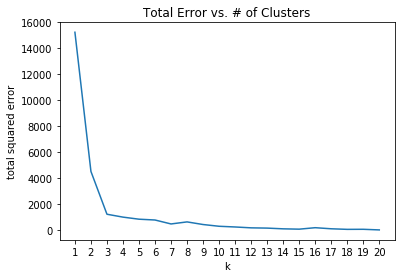

In [11]:
# now plot from 1 up to len(inputs) clusters

ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters");
# plt.show()

#plt.savefig('im/total_error_vs_num_clusters')
#plt.gca().clear()

In [12]:
import matplotlib.image as mpimg

# need to install pillow via conda to load jpg image
#image_path = r"../data/girl_with_book.jpg"
#img = mpimg.imread(image_path) / 256  # rescale to between 0 and 1

image_path = r"../data/girl_with_book.png"
img = mpimg.imread(image_path) # already scaled with png

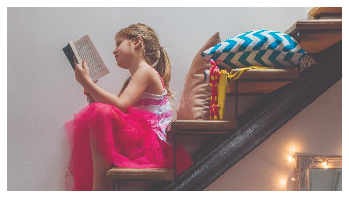

In [13]:
plt.imshow(img);
plt.axis('off');

In [14]:
# .tolist() converts a numpy array to a Python list
pixels = [pixel.tolist() for row in img for pixel in row]

In [15]:
clusterer = KMeans(5)
clusterer.train(pixels)   # this might take a while (2 minutes or more)

changed: 2 / 550000: : 27it [03:18,  7.34s/it]    


In [16]:
def recolor(pixel: Vector) -> Vector:
    cluster = clusterer.classify(pixel)        # index of the closest cluster
    return clusterer.means[cluster]            # mean of the closest cluster

new_img = [[recolor(pixel) for pixel in row]   # recolor this row of pixels
           for row in img]                     # for each row in the image

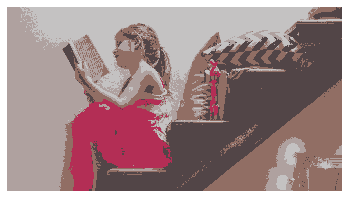

In [17]:
#plt.close()

plt.imshow(new_img)
plt.axis('off');
# plt.show()

#plt.savefig('im/recolored_girl_with_book.jpg')
#plt.gca().clear()

In [18]:
from typing import NamedTuple, Union

class Leaf(NamedTuple):
    value: Vector

leaf1 = Leaf([10,  20])
leaf2 = Leaf([30, -15])

In [19]:
class Merged(NamedTuple):
    children: tuple
    order: int

merged = Merged((leaf1, leaf2), order=1)

Cluster = Union[Leaf, Merged]

In [20]:
def get_values(cluster: Cluster) -> List[Vector]:
    if isinstance(cluster, Leaf):
        return [cluster.value]
    else:
        return [value
                for child in cluster.children
                for value in get_values(child)]

assert get_values(merged) == [[10, 20], [30, -15]]

In [21]:
from typing import Callable
from scratch.linear_algebra import distance

def cluster_distance(cluster1: Cluster,
                     cluster2: Cluster,
                     distance_agg: Callable = min) -> float:
    """
    compute all the pairwise distances between cluster1 and cluster2
    and apply the aggregation function _distance_agg_ to the resulting list
    """
    return distance_agg([distance(v1, v2)
                         for v1 in get_values(cluster1)
                         for v2 in get_values(cluster2)])

In [22]:
def get_merge_order(cluster: Cluster) -> float:
    if isinstance(cluster, Leaf):
        return float('inf')  # was never merged
    else:
        return cluster.order

In [23]:
from typing import Tuple

def get_children(cluster: Cluster):
    if isinstance(cluster, Leaf):
        raise TypeError("Leaf has no children")
    else:
        return cluster.children

In [24]:
def bottom_up_cluster(inputs: List[Vector],
                      distance_agg: Callable = min) -> Cluster:
    # Start with all leaves
    clusters: List[Cluster] = [Leaf(input) for input in inputs]

    def pair_distance(pair: Tuple[Cluster, Cluster]) -> float:
        return cluster_distance(pair[0], pair[1], distance_agg)

    # as long as we have more than one cluster left...
    while len(clusters) > 1:
        # find the two closest clusters
        c1, c2 = min(((cluster1, cluster2)
                      for i, cluster1 in enumerate(clusters)
                      for cluster2 in clusters[:i]),
                      key=pair_distance)

        # remove them from the list of clusters
        clusters = [c for c in clusters if c != c1 and c != c2]

        # merge them, using merge_order = # of clusters left
        merged_cluster = Merged((c1, c2), order=len(clusters))

        # and add their merge
        clusters.append(merged_cluster)

    # when there's only one cluster left, return it
    return clusters[0]

In [25]:
base_cluster = bottom_up_cluster(inputs)

In [26]:
base_cluster # recreating the dendrogram is left as an exercise

Merged(children=(Merged(children=(Merged(children=(Merged(children=(Merged(children=(Leaf(value=[19, 28]), Leaf(value=[21, 27])), order=18), Leaf(value=[20, 23])), order=14), Leaf(value=[26, 13])), order=3), Merged(children=(Leaf(value=[11, 15]), Leaf(value=[13, 13])), order=16)), order=1), Merged(children=(Merged(children=(Merged(children=(Merged(children=(Merged(children=(Leaf(value=[-49, 0]), Leaf(value=[-46, 5])), order=11), Leaf(value=[-41, 8])), order=9), Leaf(value=[-49, 15])), order=5), Leaf(value=[-34, -1])), order=4), Merged(children=(Merged(children=(Merged(children=(Merged(children=(Leaf(value=[-22, -16]), Leaf(value=[-19, -11])), order=10), Leaf(value=[-25, -9])), order=8), Merged(children=(Merged(children=(Merged(children=(Leaf(value=[-11, -6]), Leaf(value=[-12, -8])), order=17), Leaf(value=[-14, -5])), order=15), Leaf(value=[-18, -3])), order=13)), order=7), Merged(children=(Leaf(value=[-13, -19]), Leaf(value=[-9, -16])), order=12)), order=6)), order=2)), order=0)

In [27]:
def generate_clusters(base_cluster: Cluster,
                      num_clusters: int) -> List[Cluster]:
    # start with a list with just the base cluster
    clusters = [base_cluster]

    # as long as we don't have enough clusters yet...
    while len(clusters) < num_clusters:
        # choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        # remove it from the list
        clusters = [c for c in clusters if c != next_cluster]

        # and add its children to the list (i.e., unmerge it)
        clusters.extend(get_children(next_cluster))

    # once we have enough clusters...
    return clusters

In [28]:
three_clusters = [get_values(cluster)
                  for cluster in generate_clusters(base_cluster, 3)]

# sort smallest to largest
tc = sorted(three_clusters, key=len)
assert len(tc) == 3
assert [len(c) for c in tc] == [2, 4, 14]
assert sorted(tc[0]) == [[11, 15], [13, 13]]

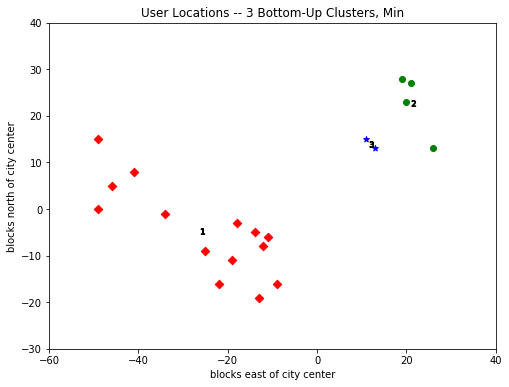

In [29]:
#plt.close()

fig,ax = plt.subplots(1,1,figsize=(8,6))
for i, cluster, marker, color in zip([1, 2, 3],
                                     three_clusters,
                                     ['D','o','*'],
                                     ['r','g','b']):
    xs, ys = zip(*cluster)  # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)

    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.xlim(-60,40);plt.ylim(-30,40);

# plt.show()
#plt.savefig('im/bottom_up_clusters_min.png')
#plt.gca().clear()
#plt.close()

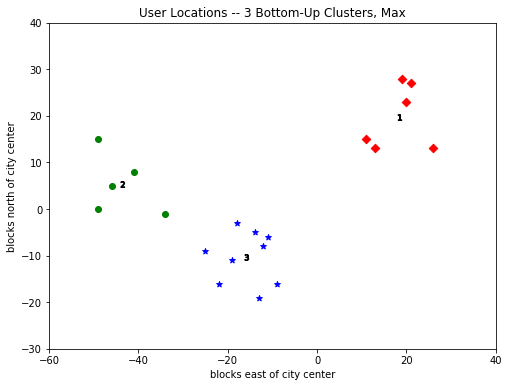

In [30]:
base_cluster_max = bottom_up_cluster(inputs, max)
three_clusters_max = [get_values(cluster)
                      for cluster in generate_clusters(base_cluster_max, 3)]

fig,ax = plt.subplots(1,1,figsize=(8,6))
for i, cluster, marker, color in zip([1, 2, 3],
                                     three_clusters_max,
                                     ['D','o','*'],
                                     ['r','g','b']):
    xs, ys = zip(*cluster)  # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)

    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 3 Bottom-Up Clusters, Max")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center");
plt.xlim(-60,40);plt.ylim(-30,40);

#plt.savefig('im/bottom_up_clusters_max.png')
#plt.gca().clear()